# Introduction to cheminformatics

Andrea Volkamer - adapted by Gautier Peyrat

#### Basic handling of molecules

* Reading & writing of molecules
* Molecular descriptors & fingerprints
* Molecular similarity

#### Using RDKit: open source cheminformatics software

More information can be found here:

* http://www.rdkit.org/docs/index.html
* http://www.rdkit.org/docs/api/index.html

In [1]:
# The majority of the basic molecular functionality is found in module rdkit.Chem library
from rdkit import Chem
from rdkit.Chem import AllChem

## Representation of molecules

### SMILES (Simplified Molecular Input Line Entry Specification)

* Atoms are represented by atomic symbols: C, N, O, F, S, Cl, Br, I
* Double bonds are `=`, triple bonds are `#`
* Branching is indicated by parenthesis
* Ring closures are indicated by pairs of matching digits

More information can be found here: http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

In [2]:
# Individual molecules can be constructed using a variety of approaches
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib

mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')

#### Drawing molecules

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

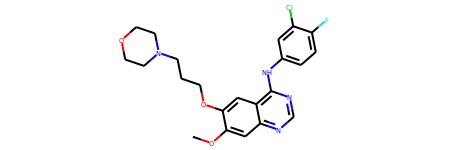

In [4]:
# Single molecule
mol1

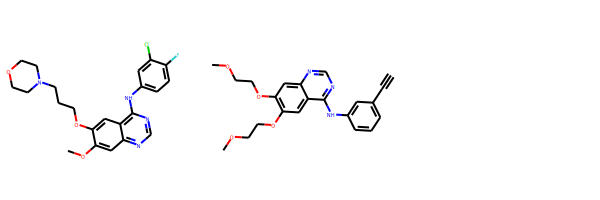

In [5]:
# List of molecules
Draw.MolsToGridImage([mol1,mol2], useSVG=True)

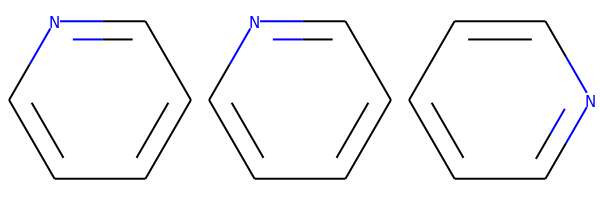

In [6]:
# A single molecule has different SMILES 
mol3 = Chem.MolFromSmiles('C1=CC=CN=C1')
mol4 = Chem.MolFromSmiles('c1cccnc1')
mol5 = Chem.MolFromSmiles('n1ccccc1')
Chem.Draw.MolsToGridImage([mol3, mol4, mol5])

In [7]:
#By default RDKit returns the canonical SMILES
print(Chem.MolToSmiles(mol3))
print(Chem.MolToSmiles(mol4))
print(Chem.MolToSmiles(mol5))

c1ccncc1
c1ccncc1
c1ccncc1


#### Isomerism

Isomerism is encoded in the SMILES with `/` and `\` symbols

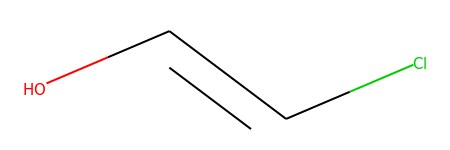

In [8]:
mol6 = Chem.MolFromSmiles("O/C=C/Cl") # E or trans isomer
mol6

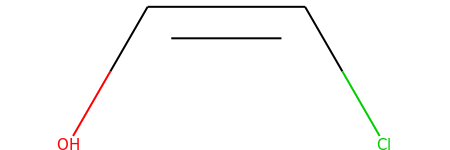

In [9]:
mol7 = Chem.MolFromSmiles('O/C=C\Cl') # Z or cis isomer
mol7

#### Chirality (stereochemistry)

Chirality is encoded with `@@` symbol

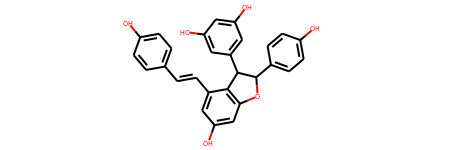

In [10]:
mol8 = Chem.MolFromSmiles('Oc1ccc(cc1)/C=C/c1cc(O)cc2c1C(c1cc(O)cc(c1)O)C(O2)c1ccc(cc1)O')
mol8

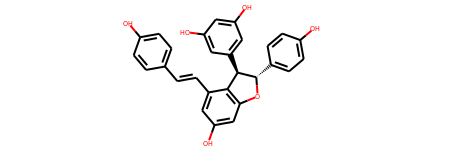

In [11]:
mol9 = Chem.MolFromSmiles('Oc1ccc(cc1)/C=C/c1cc(O)cc2c1[C@@H](c1cc(O)cc(c1)O)[C@@H](O2)c1ccc(cc1)O')
mol9

#### Molecular formats

In [12]:
# Inchi
print(Chem.MolToInchi(mol1))

InChI=1S/C22H24ClFN4O3/c1-29-20-13-19-16(12-21(20)31-8-2-5-28-6-9-30-10-7-28)22(26-14-25-19)27-15-3-4-18(24)17(23)11-15/h3-4,11-14H,2,5-10H2,1H3,(H,25,26,27)


In [13]:
# InchiKey
print(Chem.MolToInchiKey(mol1))

XGALLCVXEZPNRQ-UHFFFAOYSA-N


In [14]:
# Inchikeys from two molecules with different stereochemistry

print(Chem.MolToInchiKey(mol8))
print(Chem.MolToInchiKey(mol9))

FQWLMRXWKZGLFI-DAFODLJHSA-N
FQWLMRXWKZGLFI-YVYUXZJTSA-N


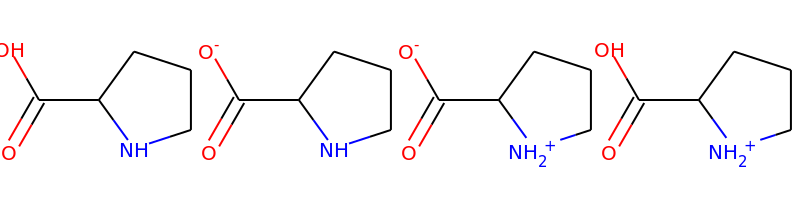

In [15]:
# Neutral and charges molecules :
mol10 = Chem.MolFromSmiles('[H]N1CCCC1C(O)=O')
mol11 = Chem.MolFromSmiles('[H]N1CCCC1C([O-])=O')
mol12 = Chem.MolFromSmiles('[NH2+]1CCCC1C([O-])=O')
mol13 = Chem.MolFromSmiles('[NH2+]1CCCC1C(O)=O')

Chem.Draw.MolsToGridImage([mol10, mol11, mol12, mol13], molsPerRow=4)

In [16]:
for mol in [mol10, mol11, mol12, mol13] :
    print(Chem.MolToInchiKey(mol))

ONIBWKKTOPOVIA-UHFFFAOYSA-N
ONIBWKKTOPOVIA-UHFFFAOYSA-M
ONIBWKKTOPOVIA-UHFFFAOYSA-N
ONIBWKKTOPOVIA-UHFFFAOYSA-O


In [17]:
# MolBlock
print(Chem.MolToMolBlock(mol1))


     RDKit          2D

 31 34  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    3.8971    0

### Generating 3D coordinates

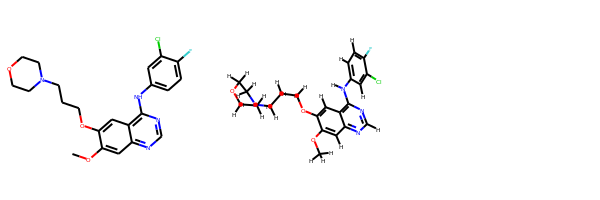

In [18]:
m_3D = Chem.AddHs(mol1)
AllChem.EmbedMolecule(m_3D)
#AllChem.UFFOptimizeMolecule(m_3D) # Improves the quality of the conformation; this step should not be necessary since v2018.09: default conformations use ETKDG
Draw.MolsToGridImage([mol1,m_3D])

In [19]:
print(Chem.MolToMolBlock(m_3D))


     RDKit          3D

 55 58  0  0  0  0  0  0  0  0999 V2000
    0.9365   -4.5087    2.3780 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4232   -3.2472    1.9648 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1478   -2.4789    1.0493 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3447   -2.9266    0.5474 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0880   -2.1733   -0.3713 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2539   -2.6491   -0.8411 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.9907   -1.9469   -1.7294 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5368   -0.7637   -2.1347 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.3907   -0.1969   -1.7311 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9707    1.0684   -2.1640 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.6045    1.9142   -3.1123 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3700    3.2977   -3.0584 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9058    4.1923   -3.9368 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7230    3.6982   -4

### Writing molecules to *sdf* (structure data files)

In [20]:
w = Chem.SDWriter('./data/mytest_mol3D.sdf')
w.write(m_3D)
w.close()

### Get information on molecules

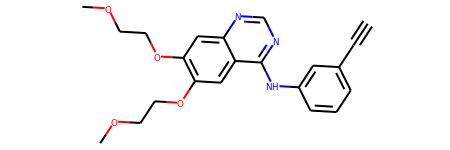

In [21]:
mol2

Number of heavy atoms (C, O, N, F, Cl ...), not H

In [22]:
mol2.GetNumHeavyAtoms()

29

Number of bonds

In [23]:
mol2.GetNumBonds()

31

### Pandas Dataframe

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation Python tool.
It allows to:
 - Manipulate data tables with labels for variables (columns) and individuals (rows).
 - These tables are called DataFrames, similar to dataframes under R.
 - Read and write these dataframes from or to a tabulated file.
 - Plot graphs from these DataFrames with matplotlib.

Here we combine Pandas dataframes and RDKit to display molecules in tables.

In [24]:
import pandas as pd   # "as pd" creates an alias to simplify the call of pandas library
from rdkit.Chem.PandasTools import RenderImagesInAllDataFrames
RenderImagesInAllDataFrames(images=True)

In [25]:
# Get the smiles of 3 drugs (Aspirin, Paracetamel and Ibuprofen) and convert them to RDKit molecules
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
paracetamol = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')
ibuprofen = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
# Create a list Lmeds containing the three drugs
Lmeds=[aspirin ,paracetamol,ibuprofen]

,ID,Molecule
0,Aspirin,
1,Paracetamol,
2,Ibuprofen,

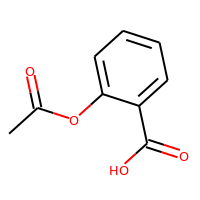
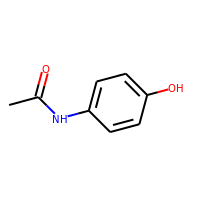
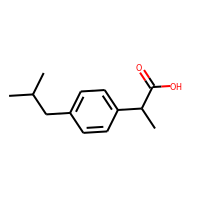

In [26]:
df_meds=pd.DataFrame()
df_meds['ID'] = ['Aspirin', 'Paracetamol', 'Ibuprofen']
df_meds['Molecule'] = Lmeds
df_meds

In [27]:
# Add heavy atom number and bond number to each row of the dataframe
L_heavyatoms = []
L_bonds =[]
for mol in df_meds.Molecule:
    L_heavyatoms.append(mol.GetNumHeavyAtoms())

,ID,Molecule,Heavy Atoms
0,Aspirin,,13
1,Paracetamol,,11
2,Ibuprofen,,15

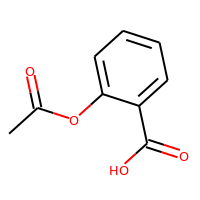
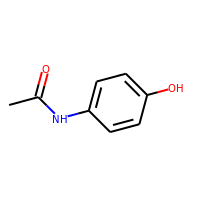
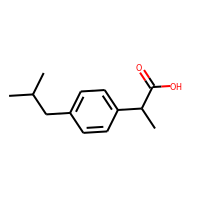

In [28]:
df_meds['Heavy Atoms'] = L_heavyatoms 
df_meds

In [29]:
from rdkit.Chem import Fragments

,ID,Molecule,Heavy Atoms,Carboxylic_acid
0,Aspirin,,13,1
1,Paracetamol,,11,0
2,Ibuprofen,,15,1

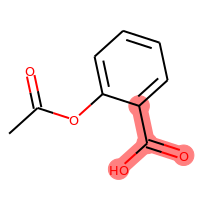
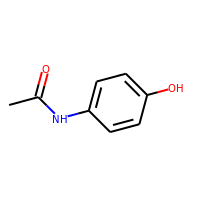
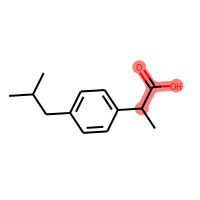

In [30]:
# Apply avoids to do a for loop and store the result in a list to append a new column in the dataframe
df_meds['Carboxylic_acid'] = df_meds.Molecule.apply(Fragments.fr_COO)
df_meds

# Quiz

In [36]:
from nbautoeval import run_yaml_quiz

In [50]:
run_yaml_quiz(f"../corrections/quiz/intro.yaml", "theoric-quiz_cheminf")

In [52]:
run_yaml_quiz(f"../corrections/quiz/intro.yaml", "code-quiz_cheminf")

In [46]:
from nbautoeval.storage import storage_clear

In [47]:
storage_clear("quiz-intro-02")
storage_clear("quiz-intro-04")